<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Михаил! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
* Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
* Контролировать добросовестность кассиров при продаже алкоголя.

Требуется построить модель, которая по фотографии определит приблизительный возраст человека. __MAE на тестовой выборке должен быть не больше 8.__

## Исследовательский анализ данных

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

import seaborn as sns
plt.style.use('seaborn-paper')
sns.set_context('notebook', font_scale=1.7)
sns.set_style('whitegrid', rc={'ytick.left':True, 'ytick.direction':'in',
                               'xtick.bottom':True, 'xtick.direction':'in',
                               'ytick.minor.visible':True})
plt.rc('font', family='serif', variant='small-caps')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
ls /datasets/faces/

final_files/  labels.csv


In [3]:
labels_df = pd.read_csv('/datasets/faces/labels.csv')

labels_df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
len(labels_df)

7591

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Ты узнал количество фотографий в датасете. Учитывая эту информацию, а также то, что ты знаешь что мы решаем задачу регрессии, попробуй порассуждать, достаточно ли имеющихся данных? Какие шаги мы можем предпринять в связи с этим?   

</div>

<div class="alert alert-block alert-info">
<b> Комментарий студента</b>
    
Понял, что не знаю формальных способов оценить, достаточно ли данных для обучения. Из шагов единственная идея $-$ аугментация, которую я упоминаю в конце раздела. 
     
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> ответ ревьюера v2</b>

На самом деле однозначно понять, достаточно ли фотографий сложно. Очень много зависит от доменной области (медицина или спутниковые снимки), требований заказчика к точности, качества датасета, шумности разметки и т.д.
 
Но прибрести опыт и интуицию, чтобы хотябы приблизительно оценить можно и нужно. Именно поэтому я предложил тебе задуматься над этим вопросом и порассуждать.
    

Давай попробую привести свою оценку. Есть средняя "в вакууме" оценка - 1000 изображений на класс для задачи классификации. Мы решаем задачу регрессии, нужно получить mae меньше 8. Можно представить близкую задачу классификации на 15 классов, которая дает похожую точность. В этом случае нам нужно 15000 изображений, т.е.в два раза больше чем у нас есть. Но хорошая новость - в два раза это не в десять, к тому же мы можем использовать отражения, поэтому по предварительной оценке данных должно хвататить.
</div>

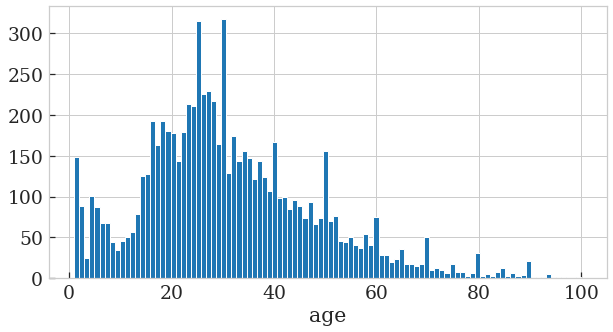

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(labels_df['real_age'], bins=100)
ax.set_xlabel('age')

plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень информативная гистограмма</div>

In [6]:
datagen = ImageDataGenerator(rescale=1./255)

datagen_flow = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory='/datasets/faces/final_files',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw"
)

Found 7591 validated image filenames.


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Верно использован ImageDataGenerator как инструмент для доступа к потоку фотографий. Но обрати внимание на название переменной train_datagen. На мой взгляд оно не соответствует тому, что в этой переменной, ведь ты еще не произвел разделение потоков фотографий на обучающий и валидационный наборы.   
</div>

<div class="alert alert-block alert-info">
<b> Комментарий студента</b>
    
Исправил
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

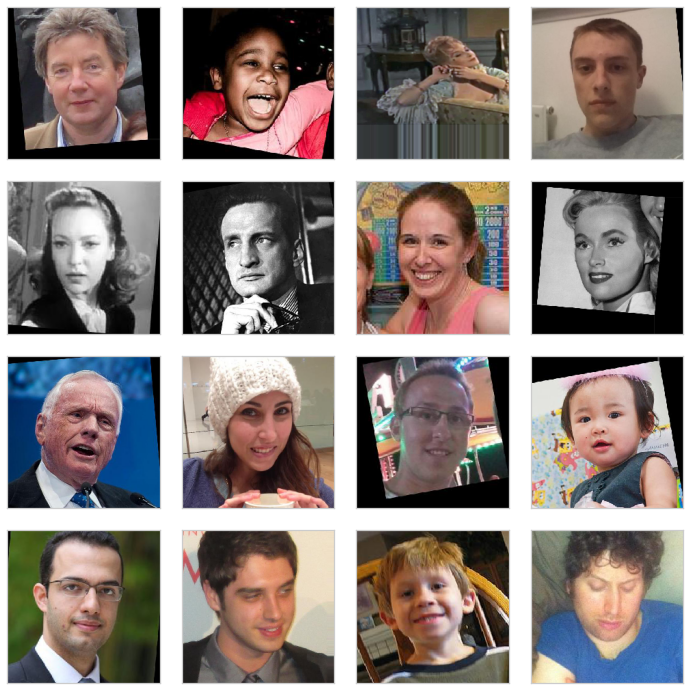

In [7]:
features, target = next(datagen_flow)

# выводим 16 изображений
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

### EDA

> Проведите исследовательский анализ данных

* Всего в выборке 7591 изображение. Как правило, на фотографиях лица изорбражены крупным планом и в центре, но иногда попадаются фотографии в полный рост

* Пик распределения по возрасту приходится на 30 лет. Второй пик наблюдается ближе к нулевому возрасту. В сторону больших возрастов тянется плавно убывающий хвост


> Сделайте выводы о том, как результаты исследования повлияют на обучение модели

* К исходным данным будет полезно применить аугментацию

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Есть выводы по результатам проведенного исследования. Что можно добавить к выводам:
    
   - Обрати внимание на на всплески количества фото в "юбилейные годы" (25-30-40-50-60-70-80-90 лет), что может свидетельствовать о не очень качественной разметки части данных.
   - В датасете есть  черно-белые фотографии (тебе не попались),  а также часть фото подвергнута повороту (выравниванию).
</div>

<div class="alert alert-block alert-info">
<b> Комментарий студента</b>
    
Я сразу вспомнил распределение избирательных участков по явке с пиками на красивых значениях. Но не подумал, что это может оказаться проблемой при обучении. Теперь кажется, что модель может тяготеть к юбилейным возрастам при предсказаниях.
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍Не думаю что это будет сильно большой проблемой в обучении, но мы должны сразу понимать, что в разметке присутствует определенная погрешность, соответственно лучше этой погрешности нашу модель мы построить не сможем </div>

## Обучение модели

```python

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

def load_train(path):

    print('*' * 80)
    print(path)
    print('*' * 80)

    labels_df = pd.read_csv(path + 'labels.csv')

    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255,
        horizontal_flip=True,
        height_shift_range=0.1,
        width_shift_range=0.1)

    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels_df,
        directory=path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode="raw",
        subset='training',
        seed=12345
    )

    return train_datagen_flow

def load_test(path):

    labels_df = pd.read_csv(path + 'labels.csv')

    validation_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)

    val_datagen_flow = validation_datagen.flow_from_dataframe(
        dataframe=labels_df,
        directory=path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode="raw",
        subset='validation',
        seed=12345)

    return val_datagen_flow


def create_model(input_shape):
    
    backbone = ResNet50(input_shape=input_shape,
                        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                        include_top=False)

    # замораживаем ResNet50 без верхушки
    # backbone.trainable = False

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=15,
               steps_per_epoch=None, validation_steps=None):

    history = model.fit(train_data,
                    validation_data=test_data,
                    batch_size=batch_size, epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=2, shuffle=True)

    print(history.history['loss'])
    print()
    print()
    print(history.history['mae'])
    print()
    print()
    print(history.history['val_loss'])
    print()
    print()
    print(history.history['val_mae'])
    print()
    print()

    return model

```

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Для тестового набора ты забыл указать subset, как следствие этот генератор вместо валидационого набора выдает объекты из всего датасета. Как следствие ты проверяешь на наборе трейн+вал и точность, которую ты видешь в логах завышена.</div>


<div class="alert alert-block alert-info">
<b> Комментарий студента</b>
    
Исправил
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Обрати внимание, что при обучении ты используешь vertical_flip, т.е. учишь модель распознавать возраст на фото вверх ногами. Нужно ли это?

</div>

<div class="alert alert-block alert-info">
<b> Комментарий студента</b>
    
Действительно. Вряд ли клиенты "Хлеб-Соль" часто будут приходить вверх ногами.
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

```
Train for 178 steps, validate for 60 steps
Epoch 1/15
2022-07-22 19:18:13.674986: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-07-22 19:18:15.780074: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 116s - loss: 245.8016 - mae: 11.2985 - val_loss: 895.5818 - val_mae: 25.0746
Epoch 2/15
178/178 - 87s - loss: 88.4838 - mae: 7.1159 - val_loss: 571.9786 - val_mae: 18.7496
Epoch 3/15
178/178 - 86s - loss: 65.9610 - mae: 6.1974 - val_loss: 545.5149 - val_mae: 18.3277
Epoch 4/15
178/178 - 87s - loss: 54.5892 - mae: 5.6764 - val_loss: 214.1293 - val_mae: 11.2198
Epoch 5/15
178/178 - 87s - loss: 46.2799 - mae: 5.2192 - val_loss: 88.6659 - val_mae: 7.1932
Epoch 6/15
178/178 - 87s - loss: 37.3953 - mae: 4.7167 - val_loss: 69.6875 - val_mae: 6.2363
Epoch 7/15
178/178 - 87s - loss: 32.3650 - mae: 4.4150 - val_loss: 69.6614 - val_mae: 6.4407
Epoch 8/15
178/178 - 87s - loss: 28.9246 - mae: 4.1393 - val_loss: 94.0202 - val_mae: 7.0889
Epoch 9/15
178/178 - 87s - loss: 25.7927 - mae: 3.9058 - val_loss: 78.4386 - val_mae: 6.7076
Epoch 10/15
178/178 - 87s - loss: 21.4941 - mae: 3.5690 - val_loss: 74.2905 - val_mae: 6.3129
Epoch 11/15
178/178 - 86s - loss: 18.3945 - mae: 3.3126 - val_loss: 77.3168 - val_mae: 6.7014
Epoch 12/15
178/178 - 87s - loss: 17.0133 - mae: 3.2044 - val_loss: 66.2263 - val_mae: 6.1245
Epoch 13/15
178/178 - 88s - loss: 16.5253 - mae: 3.1253 - val_loss: 69.8288 - val_mae: 6.1435
Epoch 14/15
Epoch 15/15
178/178 - 87s - loss: 14.8397 - mae: 2.9536 - val_loss: 61.3780 - val_mae: 5.7398
178/178 - 87s - loss: 12.8500 - mae: 2.7728 - val_loss: 67.9578 - val_mae: 6.0722

[245.84772216507457, 88.49766135073395, 65.97121070081994, 54.593865523557724, 46.28494439696194, 37.400200567456515, 32.3690863824703, 28.930551475669613, 25.79517375690124, 21.496664934255467, 18.397041201884594, 17.016485764095144, 16.524943906799468, 14.839898646401236, 12.849071384774286]


[11.298492, 7.1158767, 6.1974454, 5.6764307, 5.219172, 4.7167063, 4.414972, 4.139252, 3.9057794, 3.5690367, 3.3125503, 3.2044075, 3.1253223, 2.9536045, 2.772836]


[895.5818155924479, 571.9785680135091, 545.5149317423503, 214.12926750183107, 88.66593418121337, 69.68752403259278, 69.66144943237305, 94.02018451690674, 78.4386412302653, 74.2905060450236, 77.31680647532146, 66.22634747823079, 69.8288314183553, 61.377974637349446, 67.95777107874552]


[25.074604, 18.749596, 18.327707, 11.219835, 7.1932387, 6.2363005, 6.4406676, 7.088885, 6.7076383, 6.312901, 6.701446, 6.1245174, 6.143484, 5.739795, 6.0722113]


WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 9s - loss: 67.9578 - mae: 6.0722
Test MAE: 6.0722
```

## Анализ обученной модели

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Действительно круто, правда жаль, что даные пришлось извлекать руками.  Когда будешь учить нейронки сам, без GPU тренажера, используй объект history = model.fit(....), в нем сохраняется вся  нужная информация.</div>

<div class="alert alert-block alert-info">
<b> Комментарий студента</b>
    
Понял, хорошо. Пока реализую в костыльном виде.
    
</div>

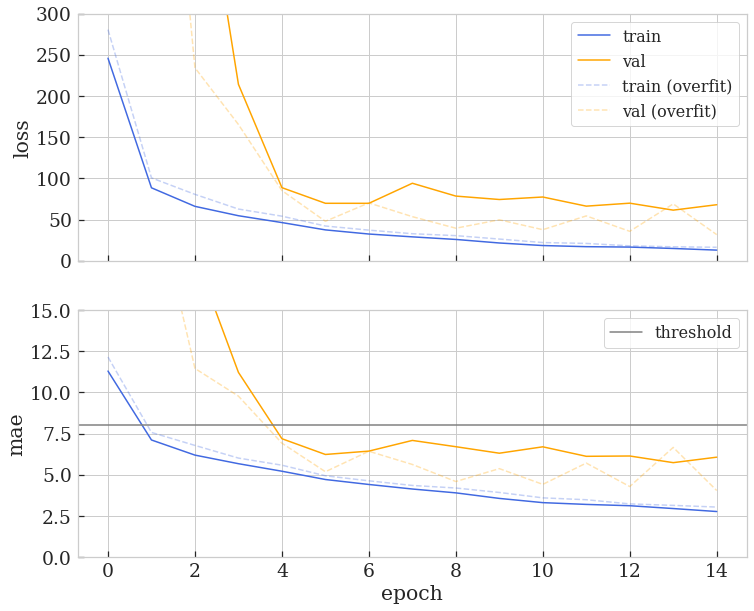

In [8]:
wrong_train_loss = [280.5461, 100.5610, 80.5440, 62.7001, 54.0444, 42.0974,
                    37.0981, 32.7492, 30.4181, 26.2539, 22.0327, 20.9610, 18.0144, 16.8667, 16.2953]

wrong_val_loss = [1083.0161, 791.1268, 234.1786, 165.3824, 85.1227, 47.8399,
                  70.1562, 53.4634, 39.4309, 49.6669, 37.6475, 54.3763, 35.6480, 68.9633, 31.6392]

wrong_train_mae = [12.1524, 7.5738, 6.7856, 6.0179, 5.5857, 4.9433, 4.6369,
                   4.3559, 4.2004, 3.9298, 3.6028, 3.4885, 3.2365, 3.1464, 3.0434]

wrong_val_mae = [28.2445, 22.9260, 11.4590, 9.7786, 6.9226, 5.1888, 6.4318,
                 5.6295, 4.5941, 5.3770, 4.4215, 5.7138, 4.2890, 6.6657, 4.0477]


train_loss = [245.84772216507457, 88.49766135073395, 65.97121070081994, 54.593865523557724,
              46.28494439696194, 37.400200567456515, 32.3690863824703, 28.930551475669613,
              25.79517375690124, 21.496664934255467, 18.397041201884594, 17.016485764095144,
              16.524943906799468, 14.839898646401236, 12.849071384774286]


train_mae = [11.298492, 7.1158767, 6.1974454, 5.6764307, 5.219172, 4.7167063, 4.414972, 4.139252,
             3.9057794, 3.5690367, 3.3125503, 3.2044075, 3.1253223, 2.9536045, 2.772836]


val_loss = [895.5818155924479, 571.9785680135091, 545.5149317423503, 214.12926750183107, 88.66593418121337,
            69.68752403259278, 69.66144943237305, 94.02018451690674, 78.4386412302653, 74.2905060450236,
            77.31680647532146, 66.22634747823079, 69.8288314183553, 61.377974637349446, 67.95777107874552]


val_mae = [25.074604, 18.749596, 18.327707, 11.219835, 7.1932387,
           6.2363005, 6.4406676, 7.088885, 6.7076383,
           6.312901, 6.701446, 6.1245174, 6.143484, 5.739795, 6.0722113]


fig, (ax, ax1) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax.plot(train_loss, label='train', color='royalblue')
ax.plot(val_loss, label='val', color='orange')

ax.plot(wrong_train_loss, label='train (overfit)', alpha=.3,
        ls='--', color='royalblue')
ax.plot(wrong_val_loss, label='val (overfit)', alpha=.3,
        ls='--', color='orange')
ax.set_ylabel('loss')
ax.set_ylim(0, 300)
ax.legend(fontsize=16)


ax1.plot(train_mae, color='royalblue')
ax1.plot(val_mae, color='orange')
ax1.plot(wrong_train_mae, alpha=.3, ls='--', color='royalblue')
ax1.plot(wrong_val_mae, alpha=.3, ls='--', color='orange')
ax1.set_ylabel('mae')
ax1.set_ylim(0, 15)
ax1.set_xlabel('epoch')
ax1.axhline(8, color='gray', label='threshold')
ax1.legend(fontsize=16)

plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    
    
Для анализа, кроме приведенных тобой графиков можно использовтаь следующий шаблон    
 - Использованная архитектура (бэкбон + голова), а также загружались ли предобученные  или рандомные веса.
 - Параметры обучения: размер батча, оптимизатор, использовалась ли заморозка весов бэкбона,  количество эпох.
 - Достигнутые метрики, наблюдалось ли переобучение.
</div>

<div class="alert alert-block alert-info">
<b> Комментарий студента</b>
    
* Архитектура: бэкбон представлен ResNet (50 слоев), сверху добавлен слой Global Average Pooling и Dense. Начальные значения весов случайные.
* Размер батча $-$ 32, оптимизатор MAE. Веса бэкбона не замораживались, общее количество эпох $-$ 15.
* Наилучшие значения метрик: `loss: 14.8 - mae: 2.95 - val_loss: 61.39 - val_mae: 5.74`. Переобучение (как будто) не наблюдается $-$ валидационные loss и mae не растут с увеличением числа эпох.
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

## Вывод

Для сетевого супермаркета «Хлеб-Соль» была построена модель, которая по фотографии определяет приблизительный возраст человека. Метрика MAE на тестовой выборке для тестовой модели составляет 6 лет.

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Давай подведем итоги. 
Ты провел содержательный EDA, а также использовал предобученную модель и c помощью finetuning и transfer-learning обучил нейронку определять возраст покупателей. Требуемая точность получена. 
    
Основная проблема связана с валидацией на полном датасете (т.е. большая часть данных, на которых ты оцениваешь модель участвовали в обучении модели). Это нужно исправить обязательно.
  
Красные комментарии на твое усмотрение.
    
Также напиши мне, если нужны рекомендации по материалам для самостоятельного развития в области нейронных сетей.
        
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Привет. Вижу что ты исправил тестовый датагенератор, теперь модель валидируется на правильном наборе данных. Также вижу что ты внес и другие исправления.
Теперь проект может быть принят. Поздравляю и желаю дальнейших успехов!
</div>